In [1]:
import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap, scipy
import jax
import sympy
from radius_of_convergence import taylor_approx, truncated_fft, radius_of_convergence_bisection, analyze_function

In [2]:
x = sympy.Symbol('x')

In [ ]:
radius_of_convergence_bisection()

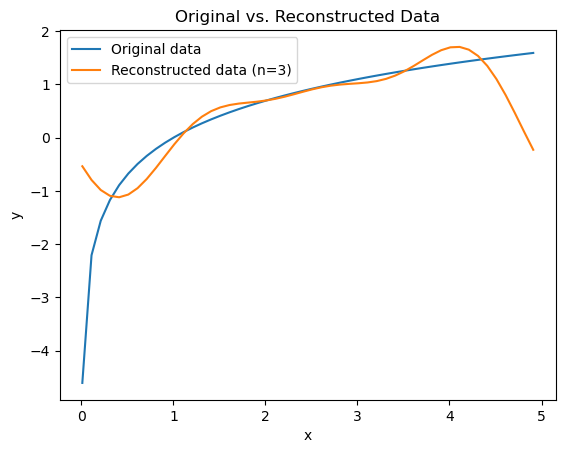

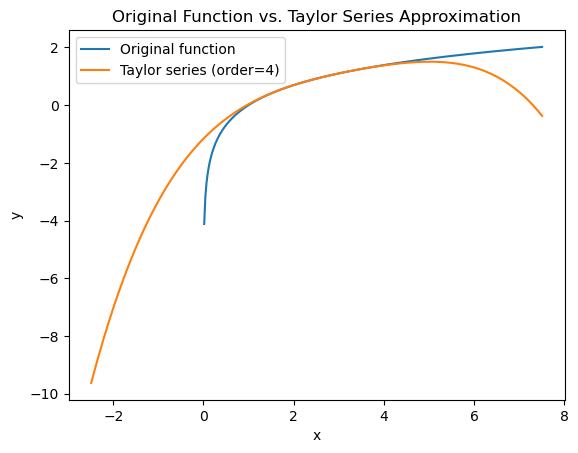

In [6]:
def f4(x):
    return jnp.log(x)
f4_expr = sympy.log(x)
f4_fourier_expr, _ = truncated_fft(f4, order=3, point=2.51, N=50, ds=0.1, plot=True) # Your interval is point +/- N*ds. This must be a continuous part of the function
f4_fourier = sympy.lambdify(x, f4_fourier_expr, 'jax')

f4_taylor_expr = taylor_approx(f4, point=2.51, order=4, plot=True)
f4_taylor = sympy.lambdify(x, f4_taylor_expr, 'jax')

In [7]:
analyze_function(f4, f4_expr)

Generated function: log(x)
Real roots: [1.00000000000000]
Radius of convergence data: [(-0.0, 2.7179)]


(log(x), [1.00000000000000])

In [8]:
analyze_function(f4_taylor, f4_taylor_expr)

Generated function: 0.398406386375427*x - 0.250000001692838*(0.398406374501992*x - 1)**4 + 0.333333351168595*(0.398406374501992*x - 1)**3 - 0.500000020885467*(0.398406374501992*x - 1)**2 - 0.0797173082828522
Real roots: [0.963116149761498, 7.30510728041433]
Radius of convergence data: [(-73.51332, 5.01995), (5.14686, None)]


(0.398406386375427*x - 0.250000001692838*(0.398406374501992*x - 1)**4 + 0.333333351168595*(0.398406374501992*x - 1)**3 - 0.500000020885467*(0.398406374501992*x - 1)**2 - 0.0797173082828522,
 [0.963116149761498, 7.30510728041433])

In [9]:
analyze_function(f4_fourier, f4_fourier_expr, real_roots=[-0.1698, 0.95926])

Generated function: -0.768110650406947*sin(0.4*pi*x) - 0.485368029454637*sin(0.8*pi*x) - 0.360507186394677*sin(1.2*pi*x) - 0.577047489193499*cos(0.4*pi*x) - 0.365812131867092*cos(0.8*pi*x) - 0.291004593728431*cos(1.2*pi*x) + 0.551481537148356
Radius of convergence data: [(0.0, 0.0), (0.39307, 1.27819)]


(-0.768110650406947*sin(0.4*pi*x) - 0.485368029454637*sin(0.8*pi*x) - 0.360507186394677*sin(1.2*pi*x) - 0.577047489193499*cos(0.4*pi*x) - 0.365812131867092*cos(0.8*pi*x) - 0.291004593728431*cos(1.2*pi*x) + 0.551481537148356,
 [-0.1698, 0.95926])

In [6]:
func1_approx

0.16666667163372*x - 0.50000000372529*(0.166666666666667*x - 1)**2 + 0.791759461164474

In [4]:
coefs

-6.48424627247051e+18*sin(0.02*pi*x) - 1.28171610431515e+19*sin(0.04*pi*x) - 1.8858951489054e+19*sin(0.06*pi*x) - 2.44911025934231e+19*sin(0.08*pi*x) + 9.81880525304071e+19*cos(0.02*pi*x) + 9.69837953818802e+19*cos(0.04*pi*x) + 9.50379147267476e+19*cos(0.06*pi*x) + 9.24350722662325e+19*cos(0.08*pi*x) + 4.92979052690641e+19

In [ ]:
def func1(x):
    return jnp.power(x-60, -1)
func1_expr = (x-60) **(-1)

p1 = sympy.plot(func1_expr, (x, -70, -50), show=False, label="Original function", legend=True, ylim=(-10, 10))
for i in range(3):
     func1_approx = taylor_approx(func1, 0.0, i)
     p2 = sympy.plot(func1_approx, (x, -70, -50), color='red', show=False, label=f"Approx of degree {i}", ylim=(-10, 10))
     p1.extend(p2)
p1.show()

coefs, reconstructed = truncated_fft(func1, n_terms=4, plot=True, N=1000, ds=0.1)


In [ ]:
coefs

In [ ]:
def func1(x):
   return -4 * jnp.sin(x) + jnp.cos(x)
func1_expr = -4 * sympy.sin(x) + sympy.cos(x)

p1 = sympy.plot(func1_expr, (x, -10, 10), show=False, label="Original function", legend=True)
for i in range(3):
    func1_approx = taylor_approx(func1, 0.0, i)
    p2 = sympy.plot(func1_approx, (x, -10, 10), color='red', show=False, label=f"Approx of degree {i}")
    p1.extend(p2)
p1.show()